In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline
from sympy import diff, symbols, cos, sin, tan
import math as math
import matplotlib.pyplot as plt

**Задание 1**
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из 
(ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем,
5-ти признаков, как вы это сделаете?


In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Вектора близки , если косинус угла между ними близок к 1

In [3]:
#  Зададим функцию вычисления косинуса  угла между двумя векторами по их координатам
def cosine( a, b ):
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [4]:
for i in range(len(raitings)): # цикл для каждого вектора
    x =()
    val =0 # минимальное значения косинуса
    for y in range(len(raitings)):  # каждый вектор должен пройти по всем 
        if y!= i:  # исключаем тот же вектор
            cos_i = cosine(raitings[i],raitings[y])
            if cos_i > val:
                val = cos_i
                x = raitings[y]
    print(raitings[i],'-наиболее похожий пользователь', x, round(val,2) )

[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6] -наиболее похожий пользователь [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] 0.91
[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7] -наиболее похожий пользователь [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] 0.87
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6] -наиболее похожий пользователь [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] 0.92
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] -наиболее похожий пользователь [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] 0.86
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6] -наиболее похожий пользователь [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4] 0.88
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1] -наиболее похожий пользователь [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10] 0.86
[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2] -наиболее похожий пользователь [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7] 0.83
[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3] -наиболее похожий пользователь [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10

In [5]:
# Для уменьшения размерности будем использовать метод анализа основных компонентов (PCA). 
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)# Параметр n_components  показывать то кол-во признаков, которое оставляем
raitings_opt = pca.fit_transform(raitings)

In [6]:
raitings_opt

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

**Задание 3**
Дана функция с неизвестными параметрами a и b,
вам также известны значения функции fx в точках x. 
Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [20]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [21]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [22]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

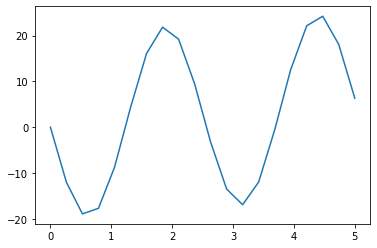

In [23]:
plt.plot(x, fx)
plt.show()

In [11]:
y1=[f(x[i],-5,0) for i in range(len(x))]
y2 =[f(x[i],0,1) for i in range(len(x))]
y3 =[f(x[i],0,0.5) for i in range(len(x))]
y4 =[f(x[i],0.5,-0.5) for i in range(len(x))]
y5 =[f(x[i],1,-1) for i in range(len(x))]
y6 =[f(x[i],1.5,-1.5) for i in range(len(x))]
y7=[f(x[i],2.5,-2.5) for i in range(len(x))]
y8=[f(x[i],3,-3) for i in range(len(x))]

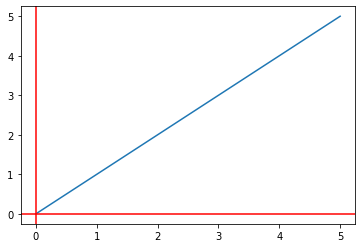

In [12]:
plt.plot(x,y1)
plt.axvline(0,color='r')
plt.axhline(0,color='r')
plt.show()
# Здесь конечно будет прямая линия, потому что косинус 0 равен 0, и в итоге получаем график у=х

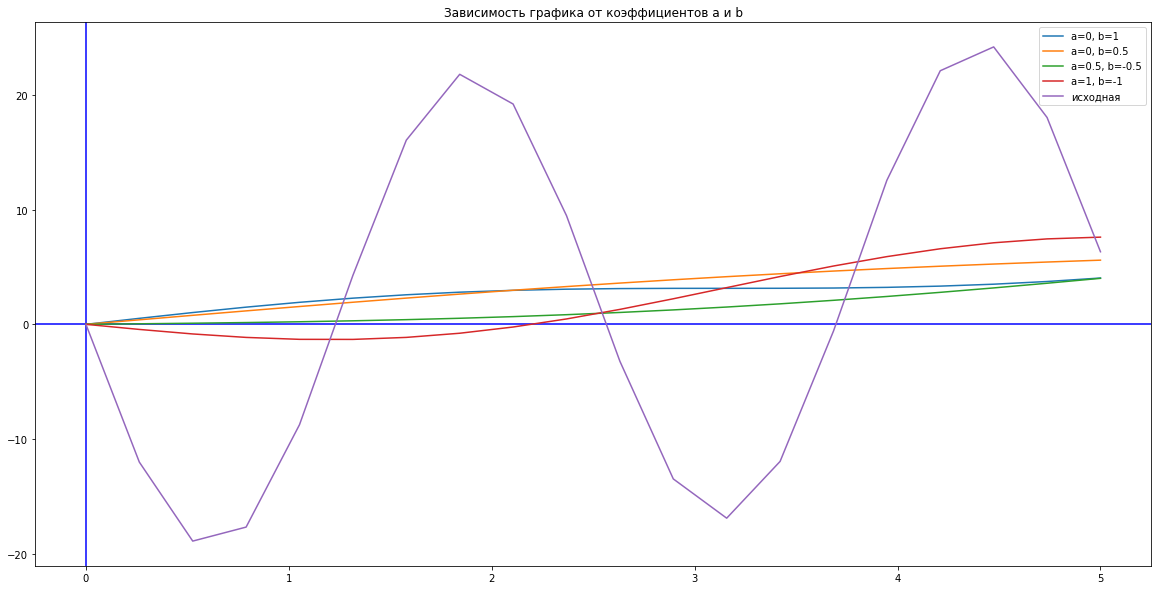

In [13]:
plt.figure(figsize=(20,10))
plt.title('Зависимость графика от коэффициентов а и b')
plt.axvline(0,color='b')
plt.axhline(0,color='b')

plt.plot(x,y2, label= 'a=0, b=1')
plt.plot(x,y3, label= 'a=0, b=0.5')
plt.plot(x,y4, label= 'a=0.5, b=-0.5')
plt.plot(x,y5, label= 'a=1, b=-1')
#plt.plot(x,y6, label= 'a=1.5, b=-1.5')
#plt.plot(x,y7, label= 'a=2.5, b=-2.5')
#plt.plot(x,y7, label= 'a=2.59, b=-2.59')
#plt.plot(x,y8, label= 'a=3, b=-3')


plt.plot(x, fx, label= 'исходная')

plt.legend()
plt.show()

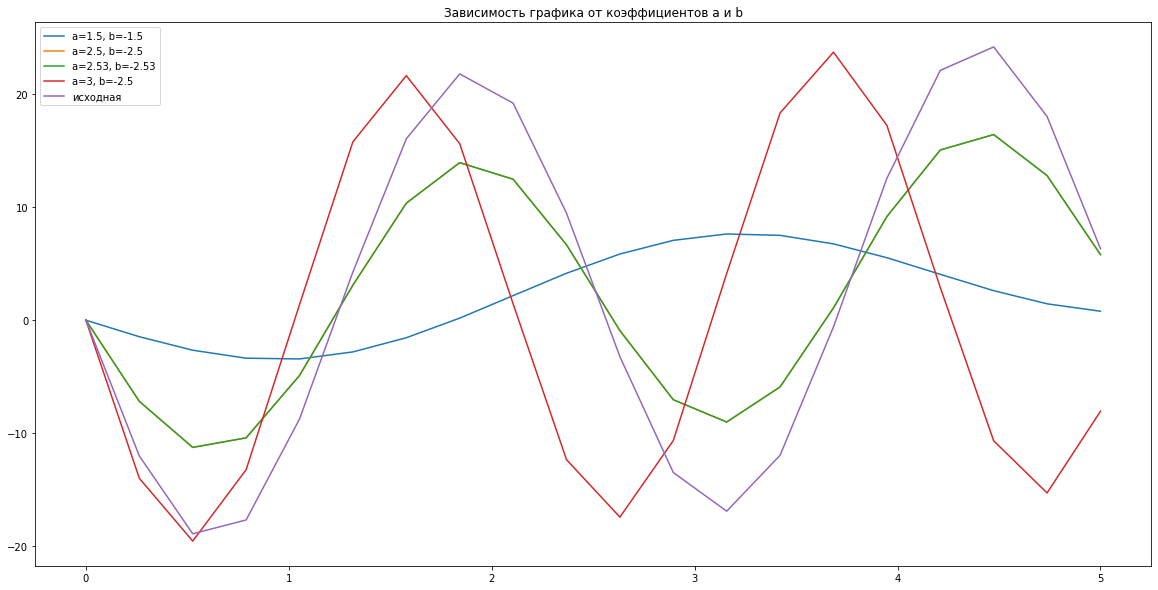

In [28]:
plt.figure(figsize=(20,10))
plt.title('Зависимость графика от коэффициентов а и b')


plt.plot(x,y6, label= 'a=1.5, b=-1.5')
plt.plot(x,y7, label= 'a=2.5, b=-2.5')
plt.plot(x,y7, label= 'a=2.53, b=-2.53') #  использую значения, которые получили с помощью цикла
plt.plot(x,y8, label= 'a=3, b=-2.5')


plt.plot(x, fx, label= 'исходная')

plt.legend()
plt.show()

In [24]:
 from scipy.optimize import minimize

In [16]:
#params = np.linspace(-50,50,100)

In [25]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [26]:
res = minimize(error, [-1,-3] , method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 82
         Function evaluations: 155


In [27]:
res

 final_simplex: (array([[ 3. , -2.5],
       [ 3. , -2.5],
       [ 3. , -2.5]]), array([1.81003151e-06, 1.97009108e-06, 2.04701687e-06]))
           fun: 1.8100315104518927e-06
       message: 'Optimization terminated successfully.'
          nfev: 155
           nit: 82
        status: 0
       success: True
             x: array([ 3. , -2.5])

**Получили значения а = 3,  b = -2,5**

In [32]:
def error(val,params):
    return np.sum(np.abs(fx - f(x, val, params)))

In [33]:
params = np.linspace(-50,50,100)
eltot=10000

In [34]:
for val in params:
    for i in range(len(params)):
        er = error(val, params[i])
        if eltot > er:
            eltot = er
            b =params[i]
            a = val
print ("ошибка равна: %.2f, оптимальные параметры :a= %.2f, b = %.2f" %((100-eltot),a,b))
        
    

ошибка равна: 4.90, оптимальные параметры :a= 2.53, b = -2.53


In [35]:
f(x,a, b)

array([  0.        ,  -7.44188753, -11.60451506, -10.60427217,
        -4.7548615 ,   3.56621262,  10.92950898,  14.31321481,
        12.389228  ,   6.08839542,  -1.79565504,  -7.79547859,
        -9.24555648,  -5.41673707,   2.17343763,  10.40659562,
        15.89071273,  16.40375322,  11.83936734,   4.25215349])

In [36]:
fx

array([  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

**Задание 4**
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. 
Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [2]:
n= 25
elements = [i for i in range(n)]
print(elements)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [3]:
probabilities = [0.03,0.03,0.01,0.01,0.01,0.01, 0.05, 0.05, 0.02, 0.04, 0.04,0.1,0.1,  0.2, 0.2, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.005, 0.005, 0.005, 0.005]
sum(probabilities)

1.0

In [4]:
# Создам дискретную величину с 20-тью значениями 
val_disc= np.random.choice(elements, 20, p=probabilities)
val_disc

array([14, 14, 14, 14, 16, 16, 11, 13, 13, 10, 13, 13, 13, 12, 17,  8,  9,
       17, 14, 15])

In [5]:
val_mean =np.array([])#задам массив выборочных средних
for i in range(1000): #цикл генерации случайных выборок количества 1000 
    val_disc_i = np.random.choice(elements, 50, p=probabilities) #генерация выборки
    mean_i =sum(val_disc_i)/50   #определение выборочного среднего среднее значение 
    val_mean =np.append(val_mean,mean_i)  #добавляем в массив новое значение среднего


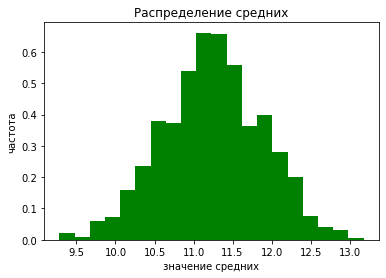

In [12]:
# Построю гистограмму распределения средних. 
plt.hist(val_mean,20,density=True, color='Green')
plt.title('Распределение средних')
plt.ylabel('частота')
plt.xlabel('значение средних')
plt.show()

**Задание 2**

Вычислите производную tg^2(sin(x) + cos(2x+3))$ в точке x_0=1 на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [2]:
x = symbols('x')

In [3]:
f_diff = diff(pow(tan(sin(x) + cos(2*x +3)),2)) #  посчитаем производную 
f_diff

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [4]:
# Закодируем формулу производной 
def f_diff(x):
    d1 = math.sin(x) + math.cos(2*x + 3)
    return 2*((-2)*math.sin(2*x + 3) + math.cos(x))*(pow(tan(d1),2) + 1)*math.tan(d1)

In [6]:
# Вычислим значение производной в точке х = 1
f_diff(1)


55.3859176353380

In [20]:
#y =#2*math.tan(1.125)*
y = 2*2.0925 *(2.458)*(4.3788+1)
y

55.330263324

In [77]:
""""""""""
используем сокращение : d1 = sin(x) + cos(2*x + 3)

   (tan^2(d1))' = 2*tan(d1)*(tan(d1))'= 2*tan(d1) * 1/cos^2(d1)* (d1)' = 

= 2*tan(d1) * (cos(x)- 2sin(2x +3)) * 1/cos^2(d1)= 
2*tan(d1) * (cos(x)- 2sin(2x +3)) *(tan^2(d1) + 1)

подставим значение х=1
d1 = 1.125

2*tan(1.125)*(cos(1)- 2sin(5))* (tan^2(1.125)+ 1) = 2*2.0925 *(2.458)*(4.3788+1) = 55.33

"""""
# совпало решение ручное и на python (с учетом округления)


'"\nиспользуем сокращение : d1 = sin(x) + cos(2*x + 3)\n\n   (tan^2(d1))\' = 2*tan(d1)*(tan(d1))\'= 2*tan(d1) * 1/cos^2(d1)* (d1)\' = \n\n= 2*tan(d1) * (cos(x)- 2sin(2x +3)) * 1/cos^2(d1)= 2*tan(d1) * (cos(x)- 2sin(2x +3)) *(tan^2(d1) + 1)\n\nподставим значение х=1\nd1 = 1.01364\n\n2*tan(1.01364)*(cos(1) - 2sin(5)) * (tan^2(1.01364) + 1) = 2*0.017699 *(0.8255)*(0+1) = 0.029\n\n'

**Задание 5**
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

In [7]:
a = np.array([
    [1,4],
    [1,1]
])

In [8]:
# вычислим собственные значения и соответствующие собственне вектора.
# Матрица 2х2, - значений будет две пары.
w, v = np.linalg.eig(a)
for i in range(len(w)):
    print ("Собственное значение " + str(w[i]))
    print ("Соответствующий ему собственный вектор" + str(v[:,i]))

Собственное значение 3.0000000000000004
Соответствующий ему собственный вектор[0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
Соответствующий ему собственный вектор[-0.89442719  0.4472136 ]


In [19]:
# Сделаем проверку
w[0]*v[:,0]

array([2.68328157, 1.34164079])

In [20]:
np.dot(a,v[:,0])

array([2.68328157, 1.34164079])

In [21]:
w[1]*v[:,1]

array([ 0.89442719, -0.4472136 ])

In [22]:
np.dot(a,v[:,1])

array([ 0.89442719, -0.4472136 ])

Значение: производные матрицы на собственный вектор и этот же вектор на собственное соответствующее значение совпадают!
- Решение верное 

In [ ]:
# Сделаем расчет в ручную 

""""""""
1-L   4
1    1-L
Собственные значения (1-L)(1-L) = 4  - это решение квадратного уровнения  L*L -2*L -3 =0
L = -1 и 3 это и есть собственные значения ( совпадают с решением выше)

Найдем вектора соответствующие им. 
(1-(-1))*x + 4*y = 0
x + (1-(-1))*y = 0
Получаем первый вектор х=-1, у = 0.5

Второй вектор:
(1-3)*x + 4y = 0
x + (1-3)*y = 0 
Получаем : х = 3, у = 1.5

""""""""
# Проверим ручной расчет


In [13]:
v1=np.array([-1, 0.5])

In [14]:
(-1)*v1

array([ 1. , -0.5])

In [15]:
np.dot(a,v1)

array([ 1. , -0.5])

In [16]:
v2=np.array([3, 1.5])

In [17]:
(3)*v2

array([9. , 4.5])

In [18]:
np.dot(a,v2)

#  Значение: производные матрицы на собственный вектор и этот же вектор 
# на собственное соответствующее значение совпадают!
#  - Решение верное 

array([9. , 4.5])